# Assignment 1

The purpose of this assignment is to serve as a "check-point" on your knowledge of
- Jupyter
- NumPy, Pandas
- The very basic elements of sklearn
- Notebook style

You will construct a linear regression model to predict the return of a ticker, given the returns of an index (SPY).  You will source the data, assemble it into a useful form, and transform it as needed.  Finally, you will use sklearn to build the model and evaluate it using the RMSE Performance metric.

# Instructions
You will need to complete this notebook.  The final result should follow the style of our Recipe for ML (see Geron, Appendix B) as appropriate

Your task is to complete the coding sections, and to add sections that discus the problem, the data, and your exploration process.  We have only supplied the required coding sections.  The rest is up to you.

1. Code sections
    - We have given you an outline of the code, with missing elements
    - The <span style="color:red">Red Section Headers</span> contain code templates that you need to complete
        - We have supplied the signature for the functions, and a specification
        - Your job is to implement the function so as to satisfy the specification
        - Please **DO NOT** change function signatures in the templates, or variable names on the left hand side of existing code without approval from the instructor or GA
        - We will test your code for correctness by calling the functions in the template, and evaluating certain variables (whose values you will compute).  If you change these, it will make evaluation more difficult.
        
1. Other sections
    - Add all the sections in our "reciple for ML" (e.g. see Geron Appendix B) as appropriate
    - Consider this an example of what you would submit as part of a take-home job interview
    - We want to see *how* you approached the problem, not just the solution

     
**REMEMBER** Working code and correct answers give partial credit.  To get full credit, your notebook should reflect your process of thinking and exploration (i.e., lots of markdown, graphs where appropriate, etc.)

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [209]:
# %load "./assignment_1_answers.py"

# <span style="color:red">Import any other modules you need</span>

In [210]:
# Your imports
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# <span style="color:red">Create function to obtain the train and test data</span>

In [211]:
def getData(ticker, indx):
    """
    Retrieve two timeseries: one for a ticker and one for an index.
    Return a DataFrame containing the two timeseries.
   
    Parameters
    ----------
    ticker, indx: Strings representing the stock symbol for "ticker" and the "index"
    
    The two timeseries are in separate CSV files.  The code below will construct the names of the files from
    the stock symbol strings.
    
    The files contain multiple features. The feature of interest to us is "Close", which is the closing price.
        
    
    Returns
    --------
    df: a DataFrame with the following properties
    
    df.index should be the dates in the timeseries
    df should have (at least) 2 columns, with names:
    "Dependent"
    "Independent"
    
    df.loc[:, "Dependent"] should be the timeseries of the "Close" attribute for the ticker
    df.loc[:, "Independent"] should be the timeseries for the "Close" attribute of the index against which we are computing beta.
    """
    
    # Construct the name of the files containing the ticker and the "index"
    ticker_file = '../assign1/data/assignment_1/{t}.csv'.format(t=ticker)
    indx_file   = '../assign1/data/assignment_1/{t}.csv'.format(t=indx)
    
    # Create the function body according to the spec
    t = pd.read_csv(ticker_file,index_col=0)
    i = pd.read_csv(indx_file,index_col=0)
    tclose = t.iloc[:,3]
    iclose = i.iloc[:,3]
    
    i=t.iloc[:,0]
    
    df1=pd.DataFrame(tclose)
    df1.columns = ['Independent']
    df2=pd.DataFrame(iclose)
    df2.columns = ['Dependent']
    df = pd.concat([df1, df2],axis=1, sort=False)
    
    # Change the return statement as appropriate
    return df

In [212]:
# Ticker: BA (Boeing), Index: SPY (the ETF for the S&P 500)

df = getData("BA", "SPY")
X = df.loc[:, ["Independent"] ]
y = df.loc[:, ["Dependent"] ]
print(X)
print(y)

            Independent
Date                   
2018-01-02   296.839996
2018-01-03   297.799988
2018-01-04   296.670013
2018-01-05   308.839996
2018-01-08   310.149994
2018-01-09   318.429993
2018-01-10   320.260010
2018-01-11   328.119995
2018-01-12   336.209991
2018-01-16   335.160004
2018-01-17   351.010010
2018-01-18   340.160004
2018-01-19   337.730011
2018-01-22   338.000000
2018-01-23   335.589996
2018-01-24   334.690002
2018-01-25   343.109985
2018-01-26   343.220001
2018-01-29   340.820007
2018-01-30   337.709991
2018-01-31   354.369995
2018-02-01   356.940002
2018-02-02   348.910004
2018-02-05   328.880005
2018-02-06   340.910004
2018-02-07   348.119995
2018-02-08   329.660004
2018-02-09   332.829987
2018-02-12   343.799988
2018-02-13   343.160004
...                 ...
2018-11-15   341.570007
2018-11-16   335.950012
2018-11-19   320.940002
2018-11-20   317.700012
2018-11-21   317.320007
2018-11-23   312.320007
2018-11-26   316.359985
2018-11-27   318.029999
2018-11-28   333

- Choose the Close columns from two csv file and create them as two dataframes, and then combine them as one data frames. Then, split them into 2, Independent and Dependent dataframes

# <span style="color:red">Create function to split the full data into train and test data</span>

In [213]:
def split(X, y, seed=42):
    """
    Split the data into a training and test set
    
    The training data should span the date range from 1/1/2018 to 6/30/2018
    The test data should span the date range from 7/1/2018 to 7/31/2018
    
    Parameters
    ----------
    X: DataFrame containing the independent variable(s) (i.e, features, predictors)
    y: DataFrame containing the dependent variable (i.e., the target)
    
    Optional
    --------
    seed: Integer used as the seed for a random number generator
      You don't necessarily NEED to use a random number generator but, if you do, please use the default value for seed
    
    Returns
    -------
    X_train: DataFrame containing training data for independent variable(s)
    X_test:  DataFrame containing test data for independent variable(s)
    y_train: DataFrame containing training data for dependent variable
    y_test:  DateFrame containing test data for dependent variable
    """
    # IF  you need to use a random number generator, use rng.
    rng = np.random.RandomState(seed)
    
    # Create the function body according to the spec
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size=0.5, shuffle=False)

    # Change the return statement as appropriate
    return X_train, X_test, y_train, y_test
   

In [214]:
# Split the data into a training and a test set
X_train, X_test, y_train, y_test = split(X, y)
print(X_train)
print(X_test)
print(y_train)
print(X_test)


            Independent
Date                   
2018-01-02   296.839996
2018-01-03   297.799988
2018-01-04   296.670013
2018-01-05   308.839996
2018-01-08   310.149994
2018-01-09   318.429993
2018-01-10   320.260010
2018-01-11   328.119995
2018-01-12   336.209991
2018-01-16   335.160004
2018-01-17   351.010010
2018-01-18   340.160004
2018-01-19   337.730011
2018-01-22   338.000000
2018-01-23   335.589996
2018-01-24   334.690002
2018-01-25   343.109985
2018-01-26   343.220001
2018-01-29   340.820007
2018-01-30   337.709991
2018-01-31   354.369995
2018-02-01   356.940002
2018-02-02   348.910004
2018-02-05   328.880005
2018-02-06   340.910004
2018-02-07   348.119995
2018-02-08   329.660004
2018-02-09   332.829987
2018-02-12   343.799988
2018-02-13   343.160004
...                 ...
2018-05-18   351.230011
2018-05-21   363.920013
2018-05-22   355.019989
2018-05-23   359.209991
2018-05-24   359.000000
2018-05-25   360.089996
2018-05-29   352.480011
2018-05-30   358.190002
2018-05-31   352

- Use train_test_split to split datasets half without shuffle into half-half(test_size=0.5, shuffle=False)

# <span style="color:red">Create a function to perform any other preparation of the data needed</span>
   

In [215]:
def prepareData( dfList ):
    """
    (latday-preday)/preday
    
    Prepare each DataFrame df in the list of DataFrames for use by the model
    
    This is the time to convert each of your datasets into the form consumed by your model.  For example:
    - do any columns of df needed to be converted into another form ?
    
    
    Parameters
    ----------
    dfList:  A list of DataFrames
    
    Returns
    -------
    finalList: A list of DataFrames.  There is a one to one correspondence between items in
      dfList and finalList, so
        
      len(finalList) == len(dfList)
    
    Consider the DataFrame at position i of dfList (i.e, dfList[i]).
    The corresponding element of finalList (i.e, finalList[i]) will have changed dfList[i] into the DataFrame
    that will be used as input by the sklearn model.

    """
    
    # Create the function body according to the spec
    result=[]
    for df in dfList:
        result.append(df.pct_change(1).iloc[1:,:])

    # Change the return statement as appropriate
    return result


# <span style="color:red">Transform the raw data, if needed</span>

In [216]:
# If needed: turn each of the "raw" X_train, X_test, y_train, y_test into a "transfomred" versions containing the features needed by the model
# - you will need to replace the empty list argument
X_train, X_test, y_train, y_test = prepareData( [ X_train, X_test, y_train, y_test ] )

- Here calculate percentage change between the current and a prior element during time series


# <span style="color:red">Create function to convert the DataFrames to ndarrays</span>

In [217]:
def pd2ndarray( dfList ):
    """
    For each DataFrame in the list dfList, prepare the ndarray needed by the sklearn model
    
    Parameters
    ----------
    dfList: List of DataFrames
    
    Returns
    --------
    ndList: a list of ndarrays
    """
    
    # Create the function body according to the spec
    result = []
    for df in dfList:
        result.append(df.as_matrix())
    
    # Change the return statement as appropriate
    return result
   

In [218]:
# sklearn takes ndarrays as arguments, not DataFrames; convert your DataFrames to the appropriate ndarray
# You will need to replace the empty list argument
X_train, X_test, y_train, y_test = pd2ndarray( [X_train, X_test, y_train, y_test] )
print(X_train)
print(X_test)
print(y_train)
print(X_test)

[[ 0.00323404]
 [-0.00379441]
 [ 0.04102195]
 [ 0.00424167]
 [ 0.02669676]
 [ 0.005747  ]
 [ 0.02454251]
 [ 0.0246556 ]
 [-0.00312301]
 [ 0.04729086]
 [-0.03091082]
 [-0.00714368]
 [ 0.00079942]
 [-0.00713019]
 [-0.00268183]
 [ 0.02515756]
 [ 0.00032064]
 [-0.00699258]
 [-0.0091251 ]
 [ 0.04933228]
 [ 0.00725233]
 [-0.02249677]
 [-0.05740735]
 [ 0.03657869]
 [ 0.02114925]
 [-0.05302767]
 [ 0.00961592]
 [ 0.03295977]
 [-0.0018615 ]
 [ 0.00492482]
 [ 0.03366677]
 [-0.00398357]
 [-0.00476004]
 [-0.00277349]
 [ 0.01007469]
 [ 0.00207909]
 [ 0.01912187]
 [ 0.00319138]
 [-0.00666417]
 [-0.03456555]
 [-0.01435554]
 [ 0.02344267]
 [-0.01085751]
 [-0.00538807]
 [ 0.00486976]
 [ 0.01660304]
 [-0.02913795]
 [-0.01603762]
 [-0.02483244]
 [-0.00084781]
 [ 0.00148491]
 [ 0.00390356]
 [ 0.0176935 ]
 [-0.00156976]
 [-0.05188378]
 [ 0.0043491 ]
 [ 0.02482866]
 [-0.02386238]
 [-0.00342553]
 [ 0.02456102]
 [-0.01659144]
 [ 0.02598935]
 [-0.01021705]
 [ 0.02736377]
 [-0.03055886]
 [-0.01116149]
 [ 0.03829

/Users/tonylin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


- Use asMatrix function to convert dataframes into ndarrays

# <span style="color:red">Create function to return the sklearn model you need</span>

In [219]:
def createModel():
    """
    Create an sklearn model object
    
    Parameters
    ----------
    None
    
    Returns
    -------
    model: An sklearn model object,
    i.e., responds to model.fit(), model.predict()
    """
    
    # Create the function body according to the spec
    regr = linear_model.LinearRegression()
    
    # Change the return statement as appropriate
    return regr

In [220]:
# Create linear regression object
model = createModel()

# Train the model using the training sets
_ = model.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', model.intercept_, model.coef_)

('Coefficients: \n', array([-0.00030104]), array([[0.36151937]]))


- Calculate linear regression model, and use X_train and y_train to train the model

# <span style="color:red">Create function to compute a Root Mean Squared Error</span>

In [221]:
def computeRMSE( target, predicted ):
    """
    Compute the Root Mean Squared Error (RMSE)
    
    Parameters
    -----------
    target: ndarray of target values
    predicted: ndarray of predicted values
    
    Returns
    -------
    rmse: a Scalar value containg the RMSE
    """
    
    # Create the function body according to the spec
    rmse = np.sqrt( mean_squared_error(target,  predicted))
    
    # Change the return statement as appropriate
    return rmse

# <span style="color:red">Evaluate in and out of sample Root Mean Squared Error</span>

In [222]:
# Predictions:
# predict out of sample: You will need to change the None argument
y_pred_test = model.predict( X_test )

# predict in sample: You will need to change the None argument
y_pred_train = model.predict( X_train )

In [223]:
# Compute the in-sample fit
# - you will need to replace the None's below with the appropriate argument
rmse_insample = computeRMSE( y_test, y_pred_test )
print("RMSE (test): {r:2.3f}".format(r=rmse_insample))

# Compute the out of sample fit
# - you will need to replace the None's below with the appropriate argument
rmse_outOfsample = computeRMSE( y_train, y_pred_train)
print("RMSE (train): {r:2.3f}".format(r=rmse_outOfsample))


RMSE (test): 0.008
RMSE (train): 0.007


- use the trained model to predic X_test and X_train
- Claculate the y_test, y_pred_test Root Mean Squared Error, and y_train, y_pred_train Root Mean Squared Error

# <span style="color:red">Please answer the following questions</span>

- What are your thoughts/theories on the in sample vs out of sample performance ?
> In sample uses the training data to train the model, so the error is smaller. On the other hand, out of sample uses the trained model to predict the test data, so the error is bigger.
- Repeat the experiment using ticker FB (Facebook) rather than ticker BA (Boeing)
    - What are your thoughts of in sample vs out of sample performance, especially compared to BA 
        - Maybe our predictor (SPX Index return) was *not* a great predictor for FB
        - any thoughts for a better one ?
            - run the experiment using another predictor; there are more timeseries in the same directory
            > BA: test error:0.008,  train error:0.007
              <br>FB: test error:0.010,  train error:0.008
              <br>The in sample error in FB is bigger than expected. Thus, it's not a good predictor.
              <br>QQQ is a really good predictor: RMSE (test): 0.004, RMSE (train): 0.003


# <span style="color:red">Extra credit</span>

- Assume our test set remains unchanged
    - Does changing the date range of our training data affect the Performance metric (test RMSE)
        - holding constant the last date of the training data
        - plot the Performance metric versus the number of days of training data
        
- What are some of the challenges of timeseries data ?
    - The Performance metric is an average that doesn't take an time-varying pattern of error into account
        - show a scatter plot of error versus distance from date of last training point
            - any pattern ? Theories ?
    - We split train/test so that each has a continous date range
        - we didn't use the standard sklearn `sklearn.model_selection.train_test_split`, which shuffles data
            - what are the consideratons of shuffling data when we are dealing with timeseries ?

# <span style="color:purple">Extra credit 1 Answer</span>

/Users/tonylin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


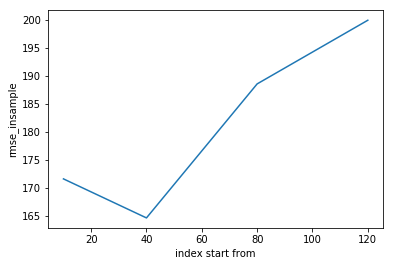

In [224]:
import matplotlib.pyplot as plt

df = getData("BA", "SPY")
X = df.loc[:, ["Independent"] ]
y = df.loc[:, ["Dependent"] ]

X_train1=X.iloc[10:126,:]
X_test1=X.iloc[127:,:]
y_train1=y.iloc[10:126,:]
y_test1=y.iloc[127:,:]

X_train2=X.iloc[40:126,:]
X_test2=X.iloc[127:,:]
y_train2=y.iloc[40:126,:]
y_test2=y.iloc[127:,:]

X_train3=X.iloc[80:126,:]
X_test3=X.iloc[127:,:]
y_train3=y.iloc[80:126,:]
y_test3=y.iloc[127:,:]

X_train4=X.iloc[120:126,:]
X_test4=X.iloc[127:,:]
y_train4=y.iloc[120:126,:]
y_test4=y.iloc[127:,:]

X_train1, X_test1, y_train1, y_test1 = pd2ndarray( [X_train1, X_test1, y_train1, y_test1] )
X_train2, X_test2, y_train2, y_test2 = pd2ndarray( [X_train2, X_test2, y_train2, y_test2] )
X_train3, X_test3, y_train3, y_test3 = pd2ndarray( [X_train3, X_test3, y_train3, y_test3] )
X_train4, X_test4, y_train4, y_test4 = pd2ndarray( [X_train4, X_test4, y_train4, y_test4] )

_ = model.fit(X_train1, y_train1)
y_pred_test = model.predict( X_test )
rmse_insample1 = computeRMSE( y_test, y_pred_test )

_ = model.fit(X_train2, y_train2)
y_pred_test = model.predict( X_test )
rmse_insample2 = computeRMSE( y_test, y_pred_test )

_ = model.fit(X_train3, y_train3)
y_pred_test = model.predict( X_test )
rmse_insample3 = computeRMSE( y_test, y_pred_test )

_ = model.fit(X_train4, y_train4)
y_pred_test = model.predict( X_test )
rmse_insample4 = computeRMSE( y_test, y_pred_test )

xarr=[10,40,80,120]
yarr=[rmse_insample1,rmse_insample2,rmse_insample3,rmse_insample4]
plt.plot(xarr, yarr)
plt.xlabel('index start from')
plt.ylabel('rmse_insample')
plt.show()

- Use BA as predictor, and try 4 different trianing data starting from 2018-01-12, 2018-02-27, 2018-04-25, 2018-06-21 based on index 10, 40, 80, 120
- We can find that error decrease first and increase from index 40

# <span style="color:purple">Extra credit 2 Answer</span>

/Users/tonylin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


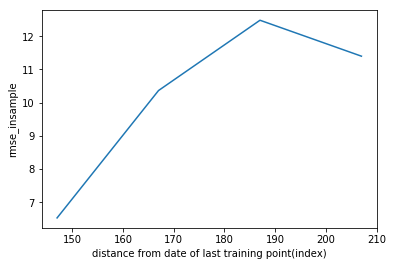

In [225]:
import matplotlib.pyplot as plt

df = getData("BA", "SPY")
X = df.loc[:, ["Independent"] ]
y = df.loc[:, ["Dependent"] ]

X_train1=X.iloc[:126,:]
X_test1=X.iloc[127:147,:]
y_train1=y.iloc[:126,:]
y_test1=y.iloc[127:147,:]

X_train2=X.iloc[:126,:]
X_test2=X.iloc[127:167,:]
y_train2=y.iloc[:126,:]
y_test2=y.iloc[127:167,:]

X_train3=X.iloc[:126,:]
X_test3=X.iloc[127:187,:]
y_train3=y.iloc[:126,:]
y_test3=y.iloc[127:187,:]

X_train4=X.iloc[:126,:]
X_test4=X.iloc[127:207,:]
y_train4=y.iloc[:126,:]
y_test4=y.iloc[127:207,:]

X_train1, X_test1, y_train1, y_test1 = pd2ndarray( [X_train1, X_test1, y_train1, y_test1] )
X_train2, X_test2, y_train2, y_test2 = pd2ndarray( [X_train2, X_test2, y_train2, y_test2] )
X_train3, X_test3, y_train3, y_test3 = pd2ndarray( [X_train3, X_test3, y_train3, y_test3] )
X_train4, X_test4, y_train4, y_test4 = pd2ndarray( [X_train4, X_test4, y_train4, y_test4] )

_ = model.fit(X_train1, y_train1)
y_pred_test = model.predict( X_test1 )
rmse_insample1 = computeRMSE( y_test1, y_pred_test )

_ = model.fit(X_train2, y_train2)
y_pred_test = model.predict( X_test2 )
rmse_insample2 = computeRMSE( y_test2, y_pred_test )

_ = model.fit(X_train3, y_train3)
y_pred_test = model.predict( X_test3 )
rmse_insample3 = computeRMSE( y_test3, y_pred_test )

_ = model.fit(X_train4, y_train4)
y_pred_test = model.predict( X_test4 )
rmse_insample4 = computeRMSE( y_test4, y_pred_test )

xarr=[147, 167, 187, 207]
yarr=[rmse_insample1,rmse_insample2,rmse_insample3,rmse_insample4]
plt.plot(xarr, yarr)
plt.xlabel('distance from date of last training point(index)')
plt.ylabel('rmse_insample')
plt.show()

- Use BA as predictor, and try 4 different errors versus distance from date of last training point starting from index 126 to 147, 167, 187, 207
- We can find that error increase and then decrease, when the date is far from the last training date, the prediction  error will be bigger
- Because this is the prediction of everyday stock, it doesn't make sense to predict a stock price in shuffle day. The fluction of stock price has some tracks.